In [243]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import torch
import torch.nn as nn
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

In [244]:
df = pd.read_excel("D:\\PytnonProject\\mix.ver2\\data.xlsx")
df = df.drop(['Unnamed: 0'], axis=1)
df = df.drop(['Загрузка смесителя, кг', 'Скорость смесителя, об/мин'], axis=1)
df

,М.ч. оксида цинка,М.ч. стеариновой кислоты,М.ч. бентонита,М.ч. жирных кислот,"Температура смешения, оС","М300, Мпа","Fразрыв, МПа","Е, %"
0,1.16,0.96,1.64,0.24,65,11.600000,22.900000,557.000000
1,1.20,1.80,2.00,0.00,120,16.100000,23.300000,413.000000
2,1.16,0.96,1.64,0.24,120,12.900000,21.300000,457.000000
3,1.18,1.18,1.65,0.00,120,12.400000,21.500000,500.000000
4,1.18,1.18,1.65,0.00,65,11.800000,22.000000,483.000000
...,...,...,...,...,...,...,...,...
494,0.99,1.72,1.29,0.00,110,10.160000,21.400000,531.670000
495,1.32,1.00,1.68,0.00,110,14.242894,23.322207,446.666667
496,1.32,1.00,1.68,0.00,110,12.281242,22.683855,463.333333
497,1.32,1.00,1.68,0.00,110,13.148111,22.211282,443.333333


In [245]:
scaler = MinMaxScaler()
scale_df = pd.DataFrame()
scale_df[['М.ч. оксида цинка', 'М.ч. стеариновой кислоты', 'М.ч. бентонита', 'М.ч. жирных кислот', 'Температура смешения, оС', 'М300, Мпа', 'Fразрыв, МПа', 'Е, %']] = scaler.fit_transform(df)

X = scale_df[['М.ч. оксида цинка', 'М.ч. стеариновой кислоты', 'М.ч. бентонита', 'М.ч. жирных кислот', 'Температура смешения, оС']]
Y = scale_df[['М300, Мпа', 'Fразрыв, МПа', 'Е, %']]

In [246]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
X_train = torch.Tensor(X_train.values)
X_test = torch.Tensor(X_test.values)
Y_train = torch.Tensor(Y_train.values)
Y_test = torch.Tensor(Y_test.values)

In [247]:
class Net(torch.nn.Module):
    def __init__(self):
        super(Net,self).__init__()
        self.fc1 = torch.nn.Linear(5, 12)
        self.act1 = torch.nn.ReLU()
        self.fc2 = torch.nn.Linear(12, 6)
        self.act2 = torch.nn.ReLU()
        self.fc3 = torch.nn.Linear(6, 3)

    def forward(self, x):
        x = self.fc1(x)
        x = self.act1(x)
        x = self.fc2(x)
        x = self.act2(x)
        x = self.fc3(x)
        return x

In [248]:
net = Net()

In [249]:
optimizer = torch.optim.Adam(net.parameters(), lr=0.01)
criterion = nn.MSELoss()
criterion_valid = nn.MSELoss()
history = []
history_valid = []

In [250]:
def predict(net, x, y):
    y_pred = net.forward(x)
    loss = criterion(y_pred, y)
    return y_pred, loss

In [251]:
def find_loss(net, x, y):
    Loss = []
    for i in range(x.shape[0]):
        y_pred = net.forward(x[i])
        MSELoss = criterion(y_pred, y[0])
        Loss.append(MSELoss.detach().numpy())
    return Loss

In [252]:
def find_loss(net, x, y):
    Loss = []
    for i in range(x.shape[0]):
        y_pred = net.forward(x[i])
        MSELoss = criterion(y_pred, y[0])
        Loss.append(MSELoss.detach().numpy())
    return Loss

In [253]:
for epoch in range(100):

    optimizer.zero_grad()
    Y_predicted = net.forward(X_train)
    loss = criterion(Y_predicted, Y_train)
    print(loss)
    loss.backward()
    optimizer.step()
    history.append(loss.item())

    Y_valid = net.forward(X_test)
    loss_valid = criterion_valid(Y_valid, Y_test)
    loss_valid.backward()
    history_valid.append(loss_valid.item())





tensor(0.3012, grad_fn=<MseLossBackward0>)
tensor(0.2469, grad_fn=<MseLossBackward0>)
tensor(0.1976, grad_fn=<MseLossBackward0>)
tensor(0.1531, grad_fn=<MseLossBackward0>)
tensor(0.1141, grad_fn=<MseLossBackward0>)
tensor(0.0816, grad_fn=<MseLossBackward0>)
tensor(0.0563, grad_fn=<MseLossBackward0>)
tensor(0.0386, grad_fn=<MseLossBackward0>)
tensor(0.0293, grad_fn=<MseLossBackward0>)
tensor(0.0278, grad_fn=<MseLossBackward0>)
tensor(0.0319, grad_fn=<MseLossBackward0>)
tensor(0.0379, grad_fn=<MseLossBackward0>)
tensor(0.0432, grad_fn=<MseLossBackward0>)
tensor(0.0462, grad_fn=<MseLossBackward0>)
tensor(0.0463, grad_fn=<MseLossBackward0>)
tensor(0.0438, grad_fn=<MseLossBackward0>)
tensor(0.0398, grad_fn=<MseLossBackward0>)
tensor(0.0350, grad_fn=<MseLossBackward0>)
tensor(0.0304, grad_fn=<MseLossBackward0>)
tensor(0.0266, grad_fn=<MseLossBackward0>)
tensor(0.0239, grad_fn=<MseLossBackward0>)
tensor(0.0224, grad_fn=<MseLossBackward0>)
tensor(0.0219, grad_fn=<MseLossBackward0>)
tensor(0.02

In [254]:
history = pd.DataFrame({'history': history})
history_valid = pd.DataFrame({'history_valid': history_valid})
fig1 = px.line(history, color_discrete_sequence=["red"])
fig2 = px.line(history_valid, color_discrete_sequence=["green"])
fig = go.Figure(data = fig1.data + fig2.data)
fig.show()


In [255]:
y_valid, loss = predict(net, X_test, Y_test)
Loss = find_loss(net, X_test, Y_test)
Loss = pd.DataFrame(Loss)
Loss.mean()

0    0.027775
dtype: float32

In [256]:
df_X_test = pd.DataFrame(X_test.detach())
df_y_valid = pd.DataFrame(y_valid.detach())

In [257]:
result = pd.concat([df_X_test, df_y_valid], axis=1)
result = scaler.inverse_transform(result)
result = pd.DataFrame(result)
result.columns = ['М.ч. оксида цинка', 'М.ч. стеариновой кислоты', 'М.ч. бентонита', 'М.ч. жирных кислот', 'Температура смешения, оС', 'М300, Мпа', 'Fразрыв, МПа', 'Е, %']
result.to_excel('predict.xlsx')
predict_result = result
predict_result

,М.ч. оксида цинка,М.ч. стеариновой кислоты,М.ч. бентонита,М.ч. жирных кислот,"Температура смешения, оС","М300, Мпа","Fразрыв, МПа","Е, %"
0,1.16,0.96,1.64,0.24,85.0,11.801842,21.909203,490.427917
1,1.16,0.96,1.64,0.24,85.0,11.801842,21.909203,490.427917
2,1.18,1.18,1.65,0.00,120.0,11.933372,21.996538,494.775970
3,1.18,1.18,1.65,0.00,120.0,11.933372,21.996538,494.775970
4,1.16,0.96,1.64,0.24,85.0,11.801842,21.909203,490.427917
...,...,...,...,...,...,...,...,...
95,1.18,1.18,1.64,0.00,120.0,11.928761,21.993475,494.623566
96,1.32,0.96,1.72,0.00,110.0,12.034691,22.063812,498.125336
97,1.20,1.00,1.60,0.20,90.0,11.842124,21.935949,491.759552
98,1.18,1.18,1.64,0.00,120.0,11.928761,21.993475,494.623566


In [258]:
df_y_test = pd.DataFrame(Y_test.detach())
result = pd.concat([df_X_test, df_y_test], axis=1)
result = scaler.inverse_transform(result)
result = pd.DataFrame(result)
result.columns = ['М.ч. оксида цинка', 'М.ч. стеариновой кислоты', 'М.ч. бентонита', 'М.ч. жирных кислот', 'Температура смешения, оС', 'М300, Мпа', 'Fразрыв, МПа', 'Е, %']
result.to_excel('fact.xlsx')
fact_result = result
fact_result

,М.ч. оксида цинка,М.ч. стеариновой кислоты,М.ч. бентонита,М.ч. жирных кислот,"Температура смешения, оС","М300, Мпа","Fразрыв, МПа","Е, %"
0,1.16,0.96,1.64,0.24,85.0,14.700000,23.100000,476.999969
1,1.16,0.96,1.64,0.24,85.0,11.400001,20.900000,483.000000
2,1.18,1.18,1.65,0.00,120.0,12.200000,20.700001,450.000031
3,1.18,1.18,1.65,0.00,120.0,12.100000,21.599998,490.000031
4,1.16,0.96,1.64,0.24,85.0,13.500000,22.800001,460.000000
...,...,...,...,...,...,...,...,...
95,1.18,1.18,1.64,0.00,120.0,14.700000,22.300001,467.000000
96,1.32,0.96,1.72,0.00,110.0,13.060000,21.809999,470.000000
97,1.20,1.00,1.60,0.20,90.0,11.200000,23.699999,493.000031
98,1.18,1.18,1.64,0.00,120.0,12.500000,21.400000,447.000000


In [259]:
fact_result.insert(6, "М300, Мпа (Предсказанное)", predict_result['М300, Мпа'])
fact_result.insert(8, "Fразрыв, МПа (Предсказанное)", predict_result['Fразрыв, МПа'])
fact_result.insert(10, "Е, % (Предсказанное)", predict_result['Е, %'])
fact_result.insert(11, "MSELoss, (считалась для нормализованных данных)", Loss)
fact_result.insert(12, "MSELoss", loss)
loss

tensor(0.0232, grad_fn=<MseLossBackward0>)

In [260]:
plt.rcParams ['figure.figsize'] = [12, 9]

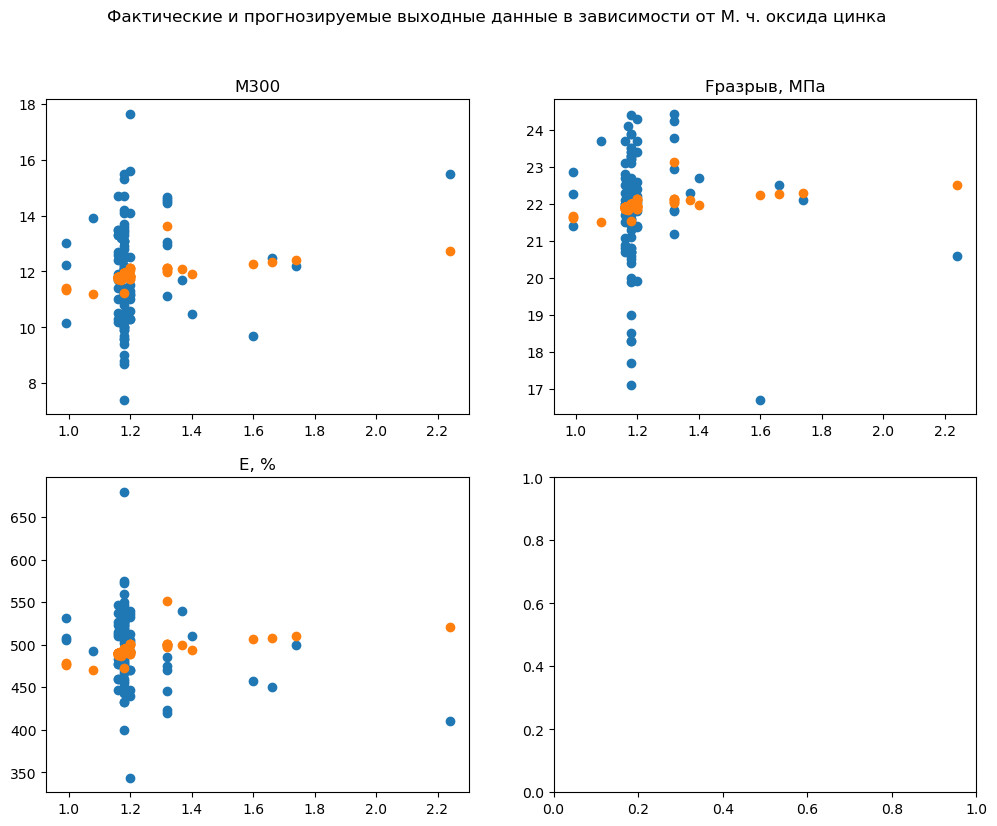

In [261]:
fig, axs = plt.subplots(2, 2)
plt.suptitle('Фактические и прогнозируемые выходные данные в зависимости от М. ч. оксида цинка')
axs[0, 0].set_title('М300')
axs[0, 0].scatter(fact_result['М.ч. оксида цинка'], fact_result['М300, Мпа'])
axs[0, 0].scatter(fact_result['М.ч. оксида цинка'], predict_result['М300, Мпа'])
axs[0, 1].set_title('Fразрыв, МПa')
axs[0, 1].scatter(fact_result['М.ч. оксида цинка'], fact_result['Fразрыв, МПа'])
axs[0, 1].scatter(fact_result['М.ч. оксида цинка'], predict_result['Fразрыв, МПа'])
axs[1, 0].set_title('Е, %')
axs[1, 0].scatter(fact_result['М.ч. оксида цинка'], fact_result['Е, %'])
axs[1, 0].scatter(fact_result['М.ч. оксида цинка'], predict_result['Е, %'])

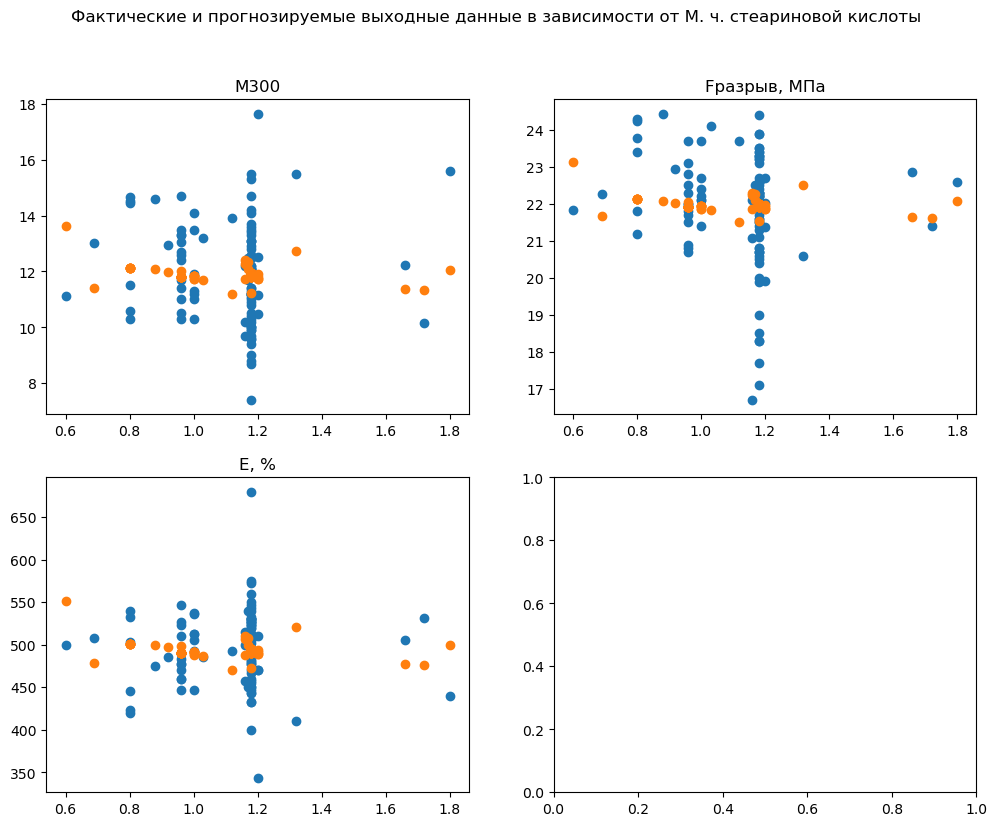

In [262]:
fig, axs = plt.subplots(2, 2)
plt.suptitle('Фактические и прогнозируемые выходные данные в зависимости от М. ч. стеариновой кислоты')
axs[0, 0].set_title('М300')
axs[0, 0].scatter(fact_result['М.ч. стеариновой кислоты'], fact_result['М300, Мпа'])
axs[0, 0].scatter(fact_result['М.ч. стеариновой кислоты'], predict_result['М300, Мпа'])
axs[0, 1].set_title('Fразрыв, МПa')
axs[0, 1].scatter(fact_result['М.ч. стеариновой кислоты'], fact_result['Fразрыв, МПа'])
axs[0, 1].scatter(fact_result['М.ч. стеариновой кислоты'], predict_result['Fразрыв, МПа'])
axs[1, 0].set_title('Е, %')
axs[1, 0].scatter(fact_result['М.ч. стеариновой кислоты'], fact_result['Е, %'])
axs[1, 0].scatter(fact_result['М.ч. стеариновой кислоты'], predict_result['Е, %'])

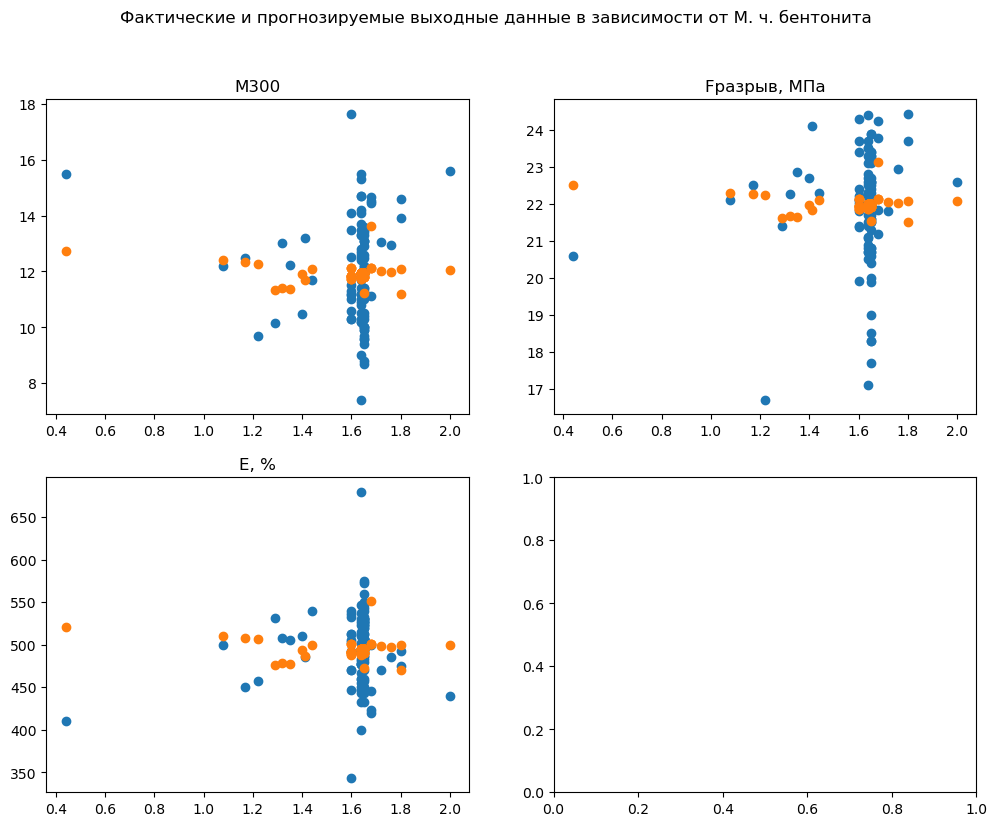

In [263]:

fig, axs = plt.subplots(2, 2)
plt.suptitle('Фактические и прогнозируемые выходные данные в зависимости от М. ч. бентонита')
axs[0, 0].set_title('М300')
axs[0, 0].scatter(fact_result['М.ч. бентонита'], fact_result['М300, Мпа'])
axs[0, 0].scatter(fact_result['М.ч. бентонита'], predict_result['М300, Мпа'])
axs[0, 1].set_title('Fразрыв, МПa')
axs[0, 1].scatter(fact_result['М.ч. бентонита'], fact_result['Fразрыв, МПа'])
axs[0, 1].scatter(fact_result['М.ч. бентонита'], predict_result['Fразрыв, МПа'])
axs[1, 0].set_title('Е, %')
axs[1, 0].scatter(fact_result['М.ч. бентонита'], fact_result['Е, %'])
axs[1, 0].scatter(fact_result['М.ч. бентонита'], predict_result['Е, %'])